# Análisis exploratorio de los datos (EDA)

El análisis exploratorio de datos (EDA) es utilizado por los científicos de datos para analizar e investigar conjuntos de datos y resumir sus características principales, a menudo empleando métodos de visualización de datos.

https://www.ibm.com/es-es/think/topics/exploratory-data-analysis

## Producto interno bruto, referencia 2018 (miles de millones de pesos)

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, stdev, median

In [69]:
df = pd.read_excel("datos/económicos/pib 2015-2025 trimestral.xlsx", skiprows=2)
df.head()

,Reg,Descripción series,2015-03-01 00:00:00,2015-06-01 00:00:00,2015-09-01 00:00:00,2015-12-01 00:00:00,2016-03-01 00:00:00,2016-06-01 00:00:00,2016-09-01 00:00:00,2016-12-01 00:00:00,...,2022-12-01 00:00:00,2023-03-01 00:00:00,2023-06-01 00:00:00,2023-09-01 00:00:00,2023-12-01 00:00:00,2024-03-01 00:00:00,2024-06-01 00:00:00,2024-09-01 00:00:00,2024-12-01 00:00:00,2025-03-01 00:00:00
0,1.0,PIB a precios corrientes,39272.406466,39194.111733,37973.235565,42183.149088,42081.767449,41215.023432,40592.644573,44875.252463,...,71762.497418,69629.831269,68652.20458,68191.658008,75383.792594,76532.681123,75091.540332,75344.195615,84662.461428,82042.344694


In [70]:
df = df.iloc[:, 2:]

,2015-03-01,2015-06-01,2015-09-01,2015-12-01,2016-03-01,2016-06-01,2016-09-01,2016-12-01,2017-03-01,2017-06-01,...,2022-12-01,2023-03-01,2023-06-01,2023-09-01,2023-12-01,2024-03-01,2024-06-01,2024-09-01,2024-12-01,2025-03-01
0,39272.406466,39194.111733,37973.235565,42183.149088,42081.767449,41215.023432,40592.644573,44875.252463,43548.741828,43858.3508,...,71762.497418,69629.831269,68652.20458,68191.658008,75383.792594,76532.681123,75091.540332,75344.195615,84662.461428,82042.344694


In [71]:
df = df.melt() #Girar columnas y filas

In [72]:
# Estadísticas descrpitivas 
df.describe()

,value
count,41.000000
mean,55388.807610
std,13384.151709
min,37973.235565
25%,44875.252463
50%,50385.108070
75%,67065.221693
max,84662.461428


In [88]:
df.iloc[:, 1].median()

50385.108069954

([<matplotlib.axis.XTick at 0x2832a397350>,
 [Text(0, 0, '2015'),
  Text(4, 0, '2016'),
  Text(8, 0, '2017'),
  Text(12, 0, '2018'),
  Text(16, 0, '2019'),
  Text(20, 0, '2020'),
  Text(24, 0, '2021'),
  Text(28, 0, '2022'),
  Text(32, 0, '2023'),
  Text(36, 0, '2024'),
  Text(40, 0, '2025')])

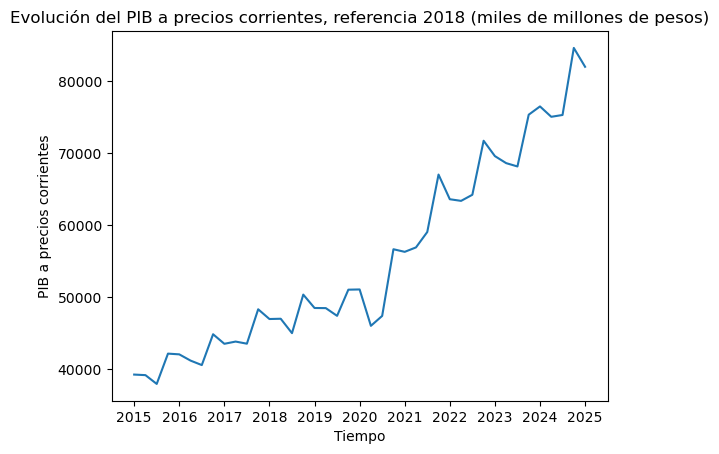

In [164]:
plt.plot(df.iloc[:, 1:])
plt.title("Evolución del PIB a precios corrientes, referencia 2018 (miles de millones de pesos)")
plt.ylabel("PIB a precios corrientes")
plt.xlabel("Tiempo")
plt.xticks(ticks=to_n(0,40,4), labels=to_n(2015, 2025, 1))

In [168]:
plt.show()

In [160]:
def to_n(min, max, steps):
    """
    Básicamente un range() pero devuelve los valores en una lista
    Inputs:
        min: Número entero desde cual comienza
        max: Número entero hasta cual llega, este incluido
        steps: Número entero de cuanto en cuanto
    Returns:
        a: Lista con dichos valores
    """
    a = []
    for i in range(min, max+1, steps):
        a.append(i)
    return a